## Assignment 6
## Bret Young
## 24 January 2021

### Assignment 6.1

Using section 5.1 in Deep Learning with Python as a guide (listing 5.3 in particular), create a ConvNet model that classifies images in the MNIST digit dataset. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [1]:
# load required packages
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

In [4]:
# instantiating convnet model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28 , 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3 , 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3 ,3), activation = 'relu'))

# show summary of model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [5]:
# add classifier on top of convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# show summary of final network
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [6]:
# train the convnet on MNIST data images
# set training and test data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# get images into required shape and scale values between 0 and 1
train_images = train_images.reshape((60000, 28, 28 ,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# make labels categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 1s 0us/step


In [20]:
len(train_images) * .8

48000.0

In [21]:
# create validation data
partial_train_images = train_images[48000:]
partial_train_labels = train_labels[48000:]

x_val = train_images[:48000]
y_val = train_labels[:48000]

In [8]:
# compile model
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [22]:
# fit model on training data
history = model.fit(partial_train_images,
                    partial_train_labels,
                    epochs = 5,
                    batch_size = 64,
                    validation_data = (x_val, y_val))

Epoch 1/5
188/188 [==============================] - 7s 35ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0064 - val_accuracy: 0.9978
Epoch 2/5
188/188 [==============================] - 7s 35ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0052 - val_accuracy: 0.9985
Epoch 3/5
188/188 [==============================] - 7s 35ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0098 - val_accuracy: 0.9975
Epoch 4/5
188/188 [==============================] - 6s 34ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.0075 - val_accuracy: 0.9982
Epoch 5/5
188/188 [==============================] - 7s 35ms/step - loss: 4.9725e-04 - accuracy: 0.9998 - val_loss: 0.0112 - val_accuracy: 0.9971


In [23]:
# same the model
model.save('results/mnist_model.h5')

In [24]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0589 - accuracy: 0.9910


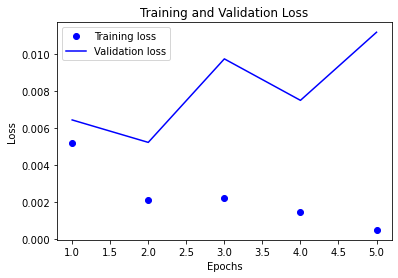

In [26]:
# load required package for plotting
import matplotlib.pyplot as plt

# visualizing training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

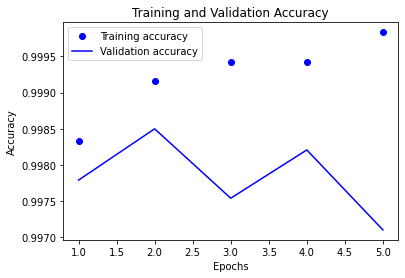

In [29]:
# visualizing training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [40]:
# use model to make predictions
model.predict(test_images)

array([[8.9767605e-19, 1.2372783e-14, 1.1407340e-15, ..., 1.0000000e+00,
        1.4723888e-16, 2.7455544e-15],
       [1.2440252e-17, 5.9981604e-18, 1.0000000e+00, ..., 8.0372307e-28,
        1.1180866e-21, 1.5592437e-33],
       [2.8715087e-20, 1.0000000e+00, 5.6771272e-17, ..., 2.7079245e-13,
        8.6901345e-17, 6.3058046e-19],
       ...,
       [1.9627813e-37, 5.8969778e-24, 1.0165472e-28, ..., 5.3463736e-22,
        6.9682141e-18, 1.4387737e-25],
       [1.5131837e-21, 4.3407244e-21, 2.9654266e-30, ..., 3.1767515e-26,
        3.1886537e-16, 7.6865742e-21],
       [3.8456873e-19, 4.2870962e-20, 4.7518680e-20, ..., 6.6190112e-30,
        2.8518402e-18, 2.6728372e-27]], dtype=float32)

### Assignment 6.2

### Assignment 6.2.a

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. Do not use dropout or data-augmentation in this part. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [43]:
# load required packages
from keras.datasets import cifar10

In [44]:
# load data
(train_img, train_lbl), (test_img, test_lbl) = cifar10.load_data()

170500096/170498071 [==============================] - 19s 0us/step


In [46]:
print(train_img[0].shape)
print(type(train_img[0]))

(32, 32, 3)
<class 'numpy.ndarray'>


In [58]:
# instantiating convnet model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32 , 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3 , 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3 , 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# show summary of model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [49]:
# get images into required shape and scale values between 0 and 1
train_img = train_img.astype('float32') / 255
test_img = test_img.astype('float32') / 255

# make labels categorical
train_lbl = to_categorical(train_lbl)
test_lbl = to_categorical(test_lbl)

In [50]:
len(train_img) * .8

40000.0

In [54]:
# create validation data
partial_train_img = train_img[40000:]
partial_train_lbl = train_lbl[40000:]

x_val = train_img[:40000]
y_val = train_lbl[:40000]

In [59]:
# compile model
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [61]:
# fit model on training data
history = model.fit(partial_train_img,
                    partial_train_lbl,
                    epochs = 20,
                    batch_size = 100,
                    validation_data = (x_val, y_val))

Epoch 1/20
100/100 [==============================] - 7s 67ms/step - loss: 1.0812 - accuracy: 0.6146 - val_loss: 1.4378 - val_accuracy: 0.5085
Epoch 2/20
100/100 [==============================] - 7s 66ms/step - loss: 1.0034 - accuracy: 0.6490 - val_loss: 1.2337 - val_accuracy: 0.5759
Epoch 3/20
100/100 [==============================] - 7s 65ms/step - loss: 0.9360 - accuracy: 0.6722 - val_loss: 1.1402 - val_accuracy: 0.6048
Epoch 4/20
100/100 [==============================] - 7s 66ms/step - loss: 0.8539 - accuracy: 0.6988 - val_loss: 1.2023 - val_accuracy: 0.5914
Epoch 5/20
100/100 [==============================] - 7s 66ms/step - loss: 0.7723 - accuracy: 0.7306 - val_loss: 1.1875 - val_accuracy: 0.6026
Epoch 6/20
100/100 [==============================] - 7s 66ms/step - loss: 0.7033 - accuracy: 0.7518 - val_loss: 1.2380 - val_accuracy: 0.5964
Epoch 7/20
100/100 [==============================] - 7s 65ms/step - loss: 0.6392 - accuracy: 0.7753 - val_loss: 1.2402 - val_accuracy: 0.6066

In [62]:
# same the model
model.save('results/cifar10_model.h5')

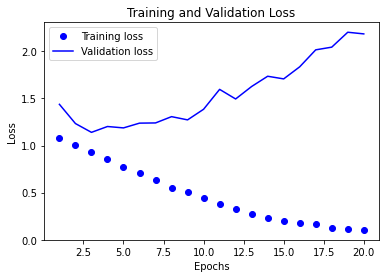

In [63]:
# visualizing training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

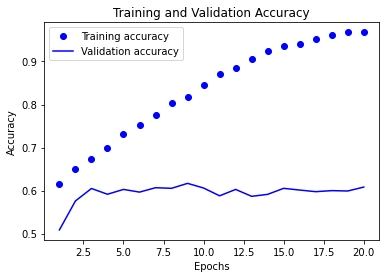

In [64]:
# visualizing training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [65]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_img, test_lbl)

313/313 [==============================] - 2s 5ms/step - loss: 2.2083 - accuracy: 0.6087


In [66]:
# use model to make predictions
model.predict(test_img)

array([[1.7023220e-03, 7.0071442e-04, 3.2855693e-02, ..., 1.2006836e-06,
        4.3316535e-04, 1.7606332e-09],
       [9.5919997e-04, 2.0691791e-06, 2.9321309e-10, ..., 3.2057056e-14,
        9.9903858e-01, 2.1529002e-07],
       [2.2668445e-03, 3.7749320e-02, 5.6899581e-02, ..., 4.9430033e-04,
        8.4784150e-01, 4.5829985e-02],
       ...,
       [9.6549721e-12, 5.8083061e-15, 4.6902660e-06, ..., 8.4781907e-02,
        2.8201205e-11, 5.7306631e-14],
       [2.7673188e-04, 7.7620232e-01, 3.2378870e-05, ..., 2.1825226e-01,
        4.6892543e-09, 9.3070876e-06],
       [1.4000377e-13, 1.4844449e-14, 6.7267543e-09, ..., 9.9986255e-01,
        1.3659674e-15, 4.1734130e-14]], dtype=float32)

### Assignment 6.2.b

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time includes dropout and data-augmentation. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [83]:
# load require packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [72]:
# instantiating convnet model with dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32 , 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3 , 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3 , 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# show summary of model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

In [84]:
# compile model
model.compile(optimizer = Adam(lr = 0.001, decay = 0, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [86]:
# load data
(train_img, train_lbl), (test_img, test_lbl) = cifar10.load_data()

In [87]:
# setting up data augmentation generators
train_datagen = ImageDataGenerator(rescale= 1. / 255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

# fit data to datagens
train_generator = train_datagen.fit(train_img)

test_generator = test_datagen.fit(test_img)

In [88]:
# make labels categorical
train_lbl = to_categorical(train_lbl)
test_lbl = to_categorical(test_lbl)

In [91]:
# fit model on training data
history = model.fit(train_datagen.flow(train_img,
                    train_lbl,
                    batch_size = 128),
                    steps_per_epoch = 75,
                    epochs = 40,
                    validation_data = (test_img, test_lbl))

Epoch 1/40
75/75 [==============================] - 8s 103ms/step - loss: 1.2819 - accuracy: 0.5430 - val_loss: 232.0316 - val_accuracy: 0.3418
Epoch 2/40
75/75 [==============================] - 8s 104ms/step - loss: 1.2264 - accuracy: 0.5673 - val_loss: 277.3300 - val_accuracy: 0.2996
Epoch 3/40
75/75 [==============================] - 8s 104ms/step - loss: 1.2709 - accuracy: 0.5493 - val_loss: 247.0160 - val_accuracy: 0.2613
Epoch 4/40
75/75 [==============================] - 8s 104ms/step - loss: 1.2393 - accuracy: 0.5545 - val_loss: 187.2179 - val_accuracy: 0.3331
Epoch 5/40
75/75 [==============================] - 8s 104ms/step - loss: 1.2436 - accuracy: 0.5551 - val_loss: 211.1610 - val_accuracy: 0.3213
Epoch 6/40
75/75 [==============================] - 8s 102ms/step - loss: 1.2280 - accuracy: 0.5651 - val_loss: 209.8908 - val_accuracy: 0.3013
Epoch 7/40
75/75 [==============================] - 8s 103ms/step - loss: 1.2394 - accuracy: 0.5603 - val_loss: 191.6044 - val_accuracy:

In [92]:
# same the model
model.save('results/cifar10_model_dropout.h5')

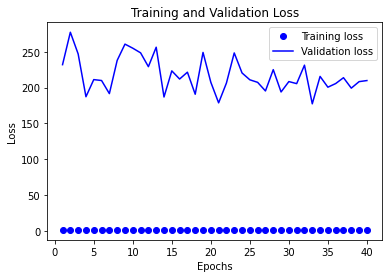

In [93]:
# visualizing training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

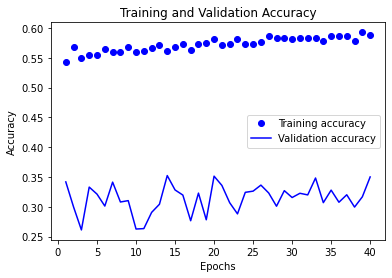

In [94]:
# visualizing training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The loss and accuracy for the validation set seems to be off from what I expected, but I am not sure how to address the issue.

### Assignment 6.3

Load the ResNet50 model. Perform image classification on five to ten images of your choice. They can be personal images or publically available images. Include the images in dsc650/assignments/assignment06/images/. Save the predictions dsc650/assignments/assignment06/results/predictions/resnet50 directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [98]:
# load required package
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [113]:
model = ResNet50(weights='imagenet')

import os

img_path = os.path.join('/home/jovyan/dsc650/dsc650/assignments/assignment06/', 'images')

images = os.listdir(img_path)

for img in images:
    im_path = os.path.join('images/', img)
    print(im_path)
    img = image.load_img(im_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', decode_predictions(preds, top=3)[0])

images/download.jpg
Predicted: [('n04482393', 'tricycle', 0.27062738), ('n03271574', 'electric_fan', 0.26139906), ('n03179701', 'desk', 0.124647595)]
images/tiger-medium.jpg
Predicted: [('n02129604', 'tiger', 0.8977178), ('n02123159', 'tiger_cat', 0.10013881), ('n02127052', 'lynx', 0.0014594225)]
images/download4.jpg
Predicted: [('n01753488', 'horned_viper', 0.38406605), ('n01756291', 'sidewinder', 0.108210616), ('n01728572', 'thunder_snake', 0.09972099)]
images/download2.jpg
Predicted: [('n02007558', 'flamingo', 0.9999714), ('n02012849', 'crane', 1.0658489e-05), ('n03532672', 'hook', 2.5975128e-06)]
images/download1.jpg
Predicted: [('n02497673', 'Madagascar_cat', 0.7530316), ('n02500267', 'indri', 0.22903742), ('n02484975', 'guenon', 0.004620276)]
images/download3.jpg
Predicted: [('n01843383', 'toucan', 0.9902644), ('n01829413', 'hornbill', 0.0028130738), ('n01818515', 'macaw', 0.0011939406)]
